In [1]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
analysis = scripts.Analysis()

In [3]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band05_wn_980_1100',
                          'P_50_T_250',
                          'min_1.e-26_max_1.e-22_ng_4',
                          'wgt_1_.6_.4_.3',
                          'subarctic_winter')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [4]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'h2o',
                               'band05_wn_980_1100',
                               'P_50_T_250',
                               'min_1.e-26_max_1.e-22_ng_4',
                               'wgt_1_.6_.4_.3',
                               'subarctic_winter')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [5]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [6]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [7]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [8]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [9]:
fig.display_hrefanchor()

In [10]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [11]:
table_dgdgs.display_hrefanchor()

In [12]:
for g in [1, 2, 3, 4]:
    s = 'Table: flux. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

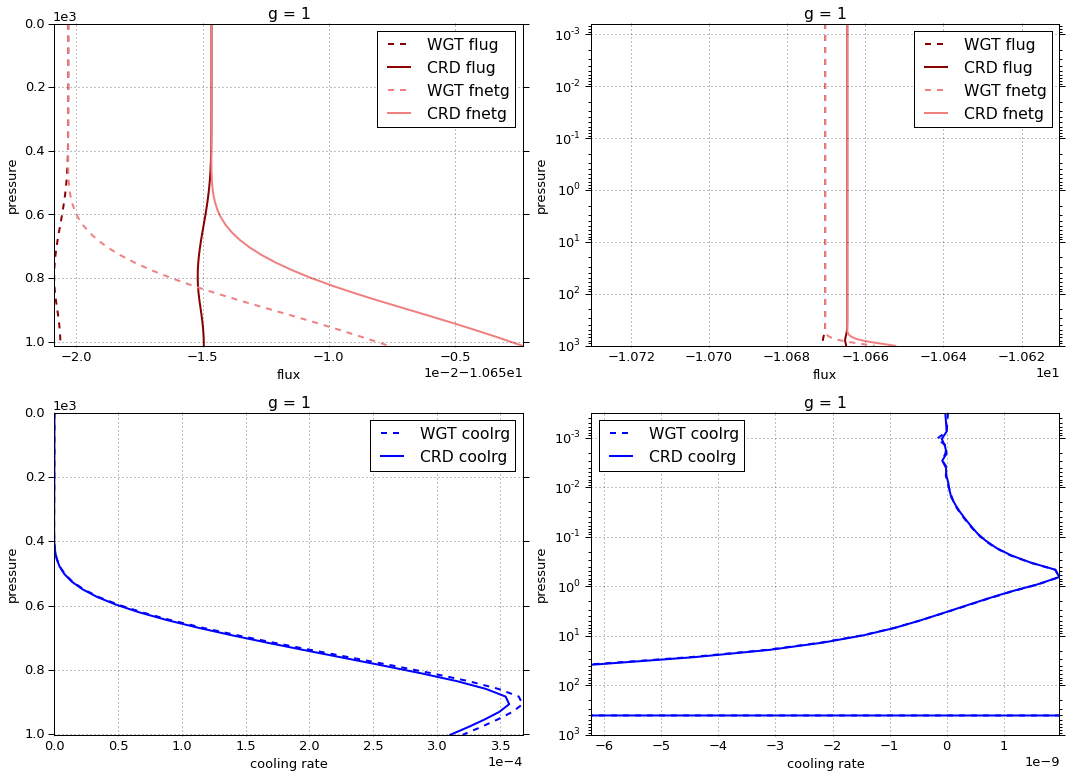

# Figure: flux, cooling rate. g-group 2

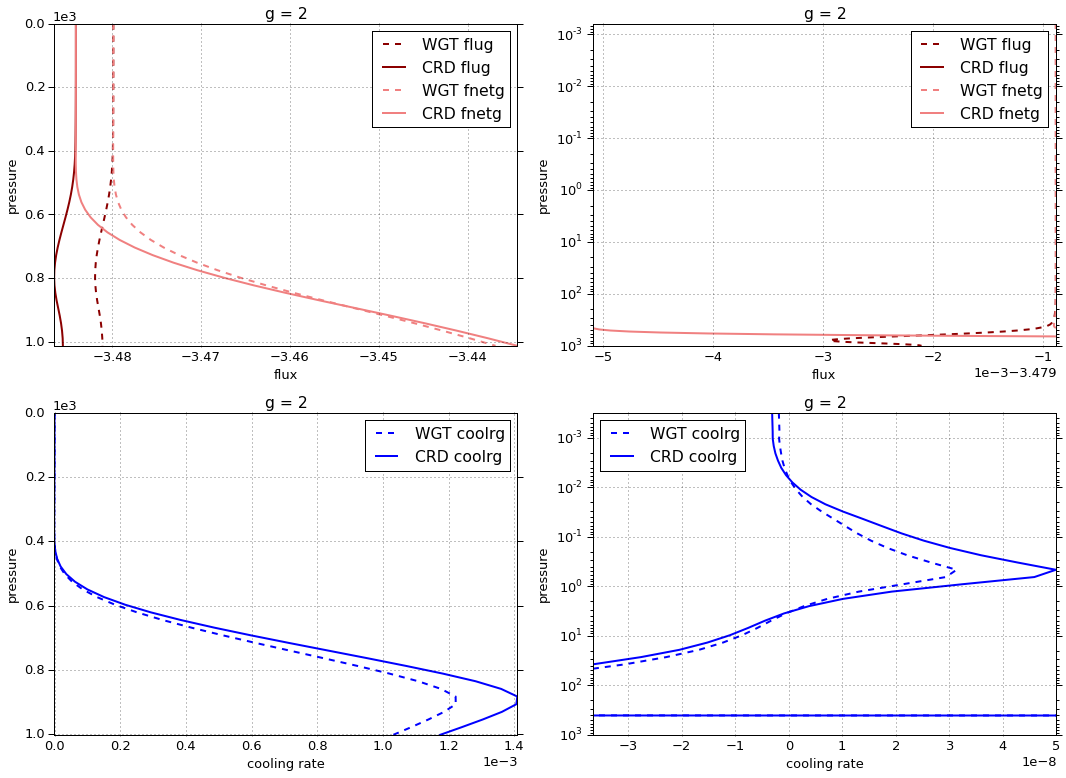

# Figure: flux, cooling rate. g-group 3

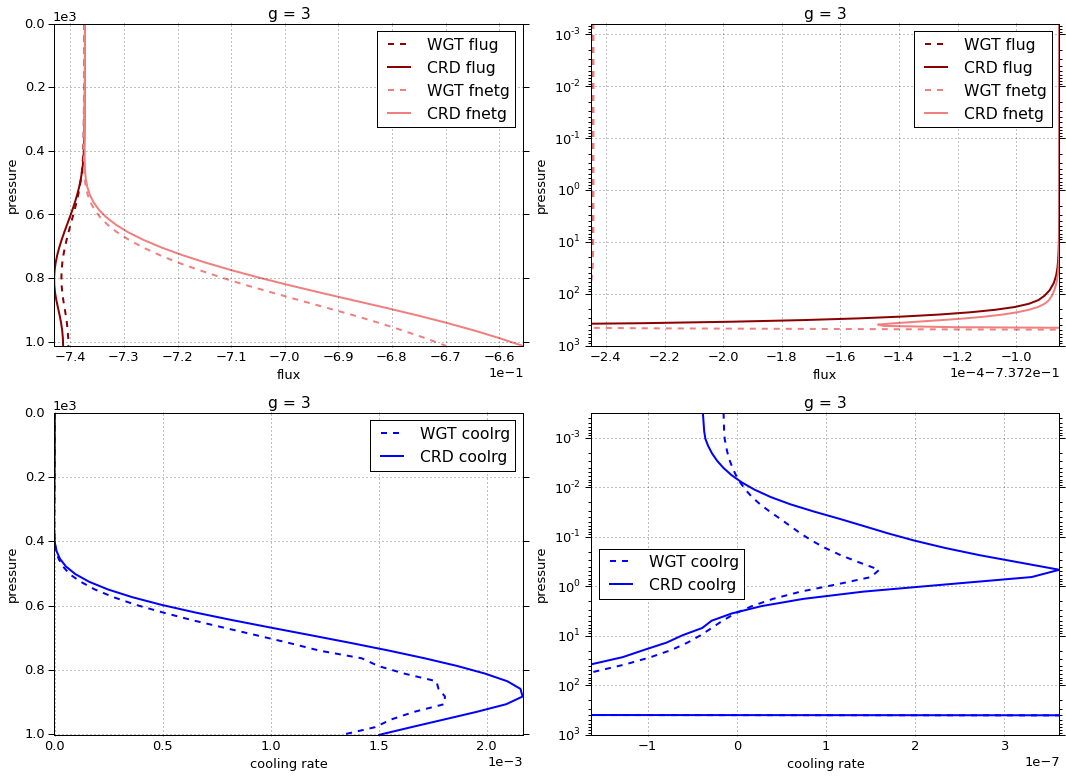

# Figure: flux, cooling rate. g-group 4

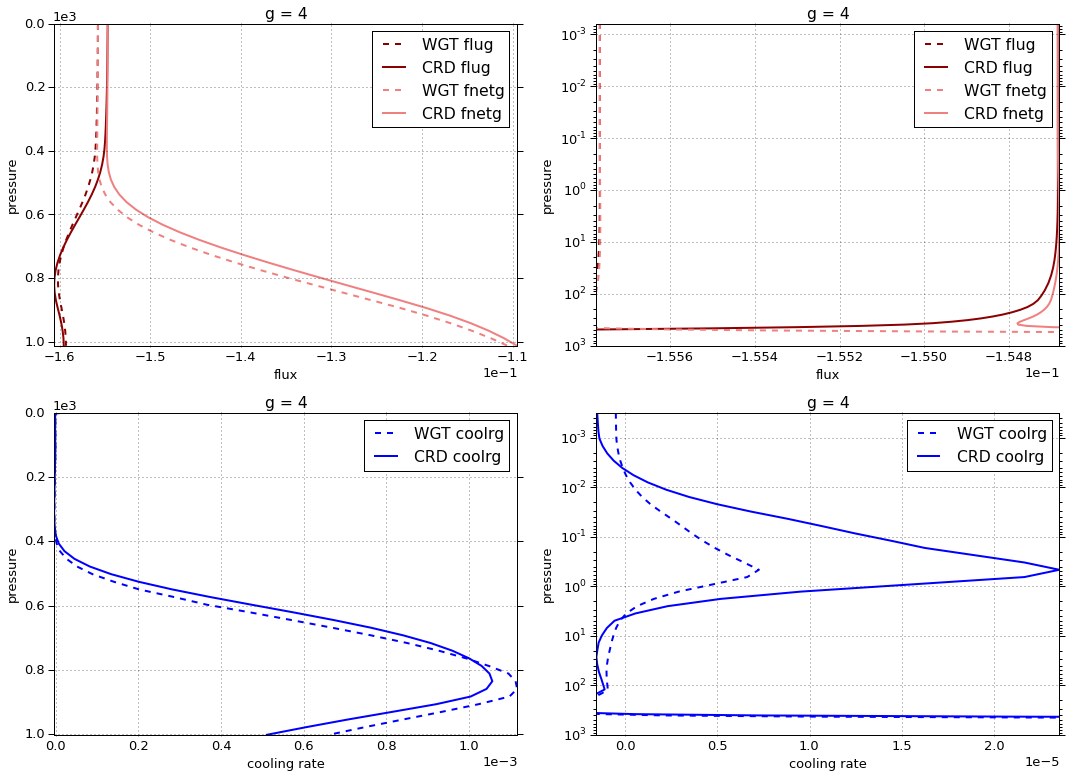

# Figure: flux, cooling rate. g-group total

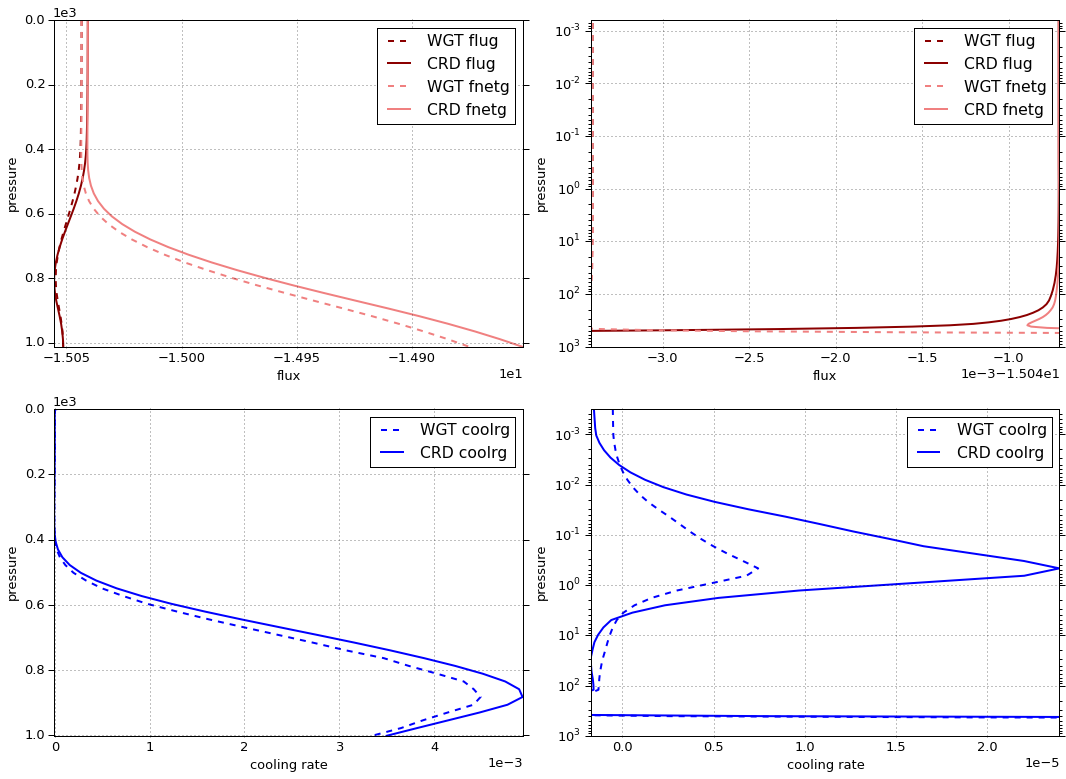

In [15]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [16]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0        1     -10.664647  0.000000 -10.664647
  1013     76    -10.664950  0.012608 -10.652342
2 0        1      -3.484094  0.000000  -3.484094
  1013     76     -3.485559  0.051141  -3.434418
3 0        1      -0.737285  0.000000  -0.737285
  1013     76     -0.741358  0.085720  -0.655638
4 0        1      -0.154685  0.000000  -0.154685
  1013     76     -0.159536  0.050040  -0.109496


WGT


flug      fldg      fnetg
g pressure level                                
1 0        1     -10.670313  0.000000 -10.670313
  1013     76    -10.670624  0.012987 -10.657637
2 0        1      -3.479881  0.000000  -3.479881
  1013     76     -3.481103  0.044232  -3.436871
3 0        1      -0.737444  0.000000  -0.737444
  1013     76     -0.740383  0.070428  -0.669955
4 0        1      -0.155766  0.000000  -0.155766
  1013     76     -0.159293  0.048756  -0.110537


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1     -0.005666  0.000000 -0.005666
  1013     76    -0.005674  0.000379 -0.005295
2 0        1      0.004212  0.000000  0.004212
  1013     76     0.004456 -0.006909 -0.002453
3 0        1     -0.000159  0.000000 -0.000159
  1013     76     0.000975 -0.015292 -0.014317
4 0        1     -0.001082  0.000000 -0.001082
  1013     76     0.000243 -0.001284 -0.001041

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1     -2.401630e-11
  1001.112500 75     3.106988e-04
2 0.000312    1     -3.110111e-09
  1001.112500 75     1.174159e-03
3 0.000312    1     -3.823095e-08
  1001.112500 75     1.503354e-03
4 0.000312    1     -1.516335e-06
  1001.112500 75     5.107567e-04


WGT


coolrg
g pressure    layer              
1 0.000312    1      2.401630e-11
  1001.112500 75     3.203898e-04
2 0.000312    1     -1.855259e-09
  1001.112500 75     1.031339e-03
3 0.000312    1     -1.503120e-08
  1001.112500 75     1.331955e-03
4 0.000312    1     -5.057661e-07
  1001.112500 75     6.608892e-04


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1      4.803261e-11
  1001.112500 75     9.691010e-06
2 0.000312    1      1.254852e-09
  1001.112500 75    -1.428203e-04
3 0.000312    1      2.319975e-08
  1001.112500 75    -1.713985e-04
4 0.000312    1      1.010569e-06
  1001.112500 75     1.501325e-04

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-15.040711,0.00000,-15.040711
1013,76,-15.051403,0.19951,-14.851894



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-15.043405,0.000000,-15.043405
1013,76,-15.051403,0.176404,-14.875000



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-2.694240e-03,0.000000,-0.002694
1013,76,-3.000000e-07,-0.023106,-0.023106


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.000002
1001.112500,75,0.003499



WGT


,,coolrg
pressure,layer,
0.000312,1,-5.226285e-07
1001.112500,75,3.344573e-03



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.000001
1001.112500,75,-0.000154


In [17]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.702125,0.708945
2,0.236625,0.231281
3,0.050375,0.049190
4,0.010875,0.010583


In [18]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 1

wgt                                           crd        \
              g level       flug          fldg      fnetg   g level   
pressure                                                              
0.000000      1     1 -10.670313  0.000000e+00 -10.670313   1     1   
0.000624      1     2 -10.670313  1.889010e-15 -10.670313   1     2   
0.000876      1     3 -10.670313  3.207382e-15 -10.670313   1     3   
0.001229      1     4 -10.670313  4.486399e-15 -10.670313   1     4   
0.001723      1     5 -10.670313  7.162497e-15 -10.670313   1     5   
0.002417      1     6 -10.670313  1.298694e-14 -10.670313   1     6   
0.003391      1     7 -10.670313  2.211716e-14 -10.670313   1     7   
0.004757      1     8 -10.670313  3.644215e-14 -10.670313   1     8   
0.006672      1     9 -10.670313  6.438376e-14 -10.670313   1     9   
0.009359      1    10 -10.670313  1.100348e-13 -10.670313   1    10   
0.013128      1    11 -10.670313  1.919707e-13 -10.670313   1    11   
0.018415      1    12 -10.670313  3.382115e-13 -10.670313   1    12   
0.025830      1    13 -10.670313  5.969272e-13 -10.670313   1    13   
0.036232      1    14 -10.670313  1.052257e-12 -10.670313   1    14   
0.050823      1    15 -10.670313  1.845642e-12 -10.670313   1    15   
0.071291      1    16 -10.670313  3.183140e-12 -10.670313   1    16   
0.100000      1    17 -10.670313  5.410676e-12 -10.670313   1    17   
0.140271      1    18 -10.670313  9.154694e-12 -10.670313   1    18   
0.196760      1    19 -10.670313  1.552806e-11 -10.670313   1    19   
0.275997      1    20 -10.670313  2.655799e-11 -10.670313   1    20   
0.387100      1    21 -10.670313  4.597410e-11 -10.670313   1    21   
0.543100      1    22 -10.670313  8.038010e-11 -10.670313   1    22   
0.761700      1    23 -10.670313  1.322701e-10 -10.670313   1    23   
1.068500      1    24 -10.670313  1.983820e-10 -10.670313   1    24   
1.498800      1    25 -10.670313  2.795148e-10 -10.670313   1    25   
2.102400      1    26 -10.670313  3.823246e-10 -10.670313   1    26   
2.949000      1    27 -10.670313  5.165648e-10 -10.670313   1    27   
4.136600      1    28 -10.670313  6.963672e-10 -10.670313   1    28   
5.802500      1    29 -10.670313  9.513870e-10 -10.670313   1    29   
8.139200      1    30 -10.670313  1.345528e-09 -10.670313   1    30   
...          ..   ...        ...           ...        ...  ..   ...   
323.525000    1    47 -10.670319  2.997072e-06 -10.670316   1    47   
347.300000    1    48 -10.670321  4.133418e-06 -10.670317   1    48   
371.075000    1    49 -10.670323  5.851368e-06 -10.670317   1    49   
394.850000    1    50 -10.670327  9.095746e-06 -10.670318   1    50   
418.625000    1    51 -10.670333  1.546321e-05 -10.670318   1    51   
442.400000    1    52 -10.670343  2.708958e-05 -10.670316   1    52   
466.175000    1    53 -10.670358  4.703554e-05 -10.670311   1    53   
489.950000    1    54 -10.670378  7.940528e-05 -10.670299   1    54   
513.725000    1    55 -10.670405  1.294410e-04 -10.670276   1    55   
537.500000    1    56 -10.670439  2.035014e-04 -10.670236   1    56   
561.275000    1    57 -10.670480  3.088606e-04 -10.670171   1    57   
585.050000    1    58 -10.670526  4.534898e-04 -10.670072   1    58   
608.825000    1    59 -10.670577  6.455480e-04 -10.669931   1    59   
632.600000    1    60 -10.670630  8.929539e-04 -10.669737   1    60   
656.375000    1    61 -10.670684  1.202865e-03 -10.669481   1    61   
680.150000    1    62 -10.670735  1.581261e-03 -10.669154   1    62   
703.925000    1    63 -10.670781  2.032688e-03 -10.668749   1    63   
727.700000    1    64 -10.670820  2.560011e-03 -10.668260   1    64   
751.475000    1    65 -10.670850  3.164440e-03 -10.667685   1    65   
775.250000    1    66 -10.670868  3.845773e-03 -10.667022   1    66   
799.025000    1    67 -10.670872  4.602060e-03 -10.666270   1    67   
822.800000    1    68 -10.670862  5.429572e-03 -10.665433   1    68   
846.575000    1    69 -10.670838  6.

In [19]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 2

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      2     1 -3.479881  0.000000e+00 -3.479881   2     1 -3.484094   
0.000624      2     2 -3.479881  8.956258e-14 -3.479881   2     2 -3.484094   
0.000876      2     3 -3.479881  1.294844e-13 -3.479881   2     3 -3.484094   
0.001229      2     4 -3.479881  1.955201e-13 -3.479881   2     4 -3.484094   
0.001723      2     5 -3.479881  3.073065e-13 -3.479881   2     5 -3.484094   
0.002417      2     6 -3.479881  4.962275e-13 -3.479881   2     6 -3.484094   
0.003391      2     7 -3.479881  8.148705e-13 -3.479881   2     7 -3.484094   
0.004757      2     8 -3.479881  1.353119e-12 -3.479881   2     8 -3.484094   
0.006672      2     9 -3.479881  2.263407e-12 -3.479881   2     9 -3.484094   
0.009359      2    10 -3.479881  3.803585e-12 -3.479881   2    10 -3.484094   
0.013128      2    11 -3.479881  6.410093e-12 -3.479881   2    11 -3.484094   
0.018415      2    12 -3.479881  1.082850e-11 -3.479881   2    12 -3.484094   
0.025830      2    13 -3.479881  1.832607e-11 -3.479881   2    13 -3.484094   
0.036232      2    14 -3.479881  3.103916e-11 -3.479881   2    14 -3.484094   
0.050823      2    15 -3.479881  5.218998e-11 -3.479881   2    15 -3.484094   
0.071291      2    16 -3.479881  8.626140e-11 -3.479881   2    16 -3.484094   
0.100000      2    17 -3.479881  1.402803e-10 -3.479881   2    17 -3.484094   
0.140271      2    18 -3.479881  2.260177e-10 -3.479881   2    18 -3.484094   
0.196760      2    19 -3.479881  3.626883e-10 -3.479881   2    19 -3.484094   
0.275997      2    20 -3.479881  5.817701e-10 -3.479881   2    20 -3.484094   
0.387100      2    21 -3.479881  9.350259e-10 -3.479881   2    21 -3.484094   
0.543100      2    22 -3.479881  1.502362e-09 -3.479881   2    22 -3.484094   
0.761700      2    23 -3.479881  2.273211e-09 -3.479881   2    23 -3.484094   
1.068500      2    24 -3.479881  3.145761e-09 -3.479881   2    24 -3.484094   
1.498800      2    25 -3.479881  4.080689e-09 -3.479881   2    25 -3.484094   
2.102400      2    26 -3.479881  5.108932e-09 -3.479881   2    26 -3.484094   
2.949000      2    27 -3.479881  6.281239e-09 -3.479881   2    27 -3.484094   
4.136600      2    28 -3.479881  7.671731e-09 -3.479881   2    28 -3.484094   
5.802500      2    29 -3.479881  9.449276e-09 -3.479881   2    29 -3.484094   
8.139200      2    30 -3.479881  1.196958e-08 -3.479881   2    30 -3.484094   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    2    47 -3.479904  1.230537e-05 -3.479892   2    47 -3.484121   
347.300000    2    48 -3.479911  1.680334e-05 -3.479895   2    48 -3.484129   
371.075000    2    49 -3.479921  2.356169e-05 -3.479897   2    49 -3.484140   
394.850000    2    50 -3.479935  3.624541e-05 -3.479899   2    50 -3.484158   
418.625000    2    51 -3.479960  6.098031e-05 -3.479899   2    51 -3.484187   
442.400000    2    52 -3.479999  1.058508e-04 -3.479893   2    52 -3.484233   
466.175000    2    53 -3.480055  1.823212e-04 -3.479873   2    53 -3.484299   
489.950000    2    54 -3.480133  3.055881e-04 -3.479827   2    54 -3.484391   
513.725000    2    55 -3.480235  4.948258e-04 -3.479740   2    55 -3.484512   
537.500000    2    56 -3.480361  7.729788e-04 -3.479589   2    56 -3.484662   
561.275000    2    57 -3.480512  1.165887e-03 -3.479346   2    57 -3.484840   
585.050000    2    58 -3.480684  1.701376e-03 -3.478982   2    58 -3.485043   
608.825000    2    59 -3.480870  2.407297e-03 -3.478463   2    59 -3.485264   
632.600000    2    60 -3.481065  3.309947e-03 -3.477755   2    60 -3.485495   
656.375000    2    61 -3.481259  4.432205e-03 -3.476827   2    61 -3.485726   
680.150000    2    62 -3.481444  5.792124e-03 -3.475652   2    62 -3.485947   
703.925000    2    63 -3.481611  7.402144e-03 -3.474209   2   

In [20]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 3

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      3     1 -0.737444  0.000000e+00 -0.737444   3     1 -0.737285   
0.000624      3     2 -0.737444  7.490613e-13 -0.737444   3     2 -0.737285   
0.000876      3     3 -0.737444  1.078428e-12 -0.737444   3     3 -0.737285   
0.001229      3     4 -0.737444  1.606722e-12 -0.737444   3     4 -0.737285   
0.001723      3     5 -0.737444  2.471064e-12 -0.737444   3     5 -0.737285   
0.002417      3     6 -0.737444  3.885174e-12 -0.737444   3     6 -0.737285   
0.003391      3     7 -0.737444  6.199618e-12 -0.737444   3     7 -0.737285   
0.004757      3     8 -0.737444  9.989029e-12 -0.737444   3     8 -0.737285   
0.006672      3     9 -0.737444  1.619693e-11 -0.737444   3     9 -0.737285   
0.009359      3    10 -0.737444  2.637524e-11 -0.737444   3    10 -0.737285   
0.013128      3    11 -0.737444  4.308104e-11 -0.737444   3    11 -0.737285   
0.018415      3    12 -0.737444  7.053770e-11 -0.737444   3    12 -0.737285   
0.025830      3    13 -0.737444  1.157335e-10 -0.737444   3    13 -0.737285   
0.036232      3    14 -0.737444  1.900932e-10 -0.737444   3    14 -0.737285   
0.050823      3    15 -0.737444  3.105900e-10 -0.737444   3    15 -0.737285   
0.071291      3    16 -0.737444  5.007859e-10 -0.737444   3    16 -0.737285   
0.100000      3    17 -0.737444  7.971052e-10 -0.737444   3    17 -0.737285   
0.140271      3    18 -0.737444  1.259309e-09 -0.737444   3    18 -0.737285   
0.196760      3    19 -0.737444  1.983415e-09 -0.737444   3    19 -0.737285   
0.275997      3    20 -0.737444  3.124248e-09 -0.737444   3    20 -0.737285   
0.387100      3    21 -0.737444  4.932310e-09 -0.737444   3    21 -0.737285   
0.543100      3    22 -0.737444  7.790811e-09 -0.737444   3    22 -0.737285   
0.761700      3    23 -0.737444  1.169833e-08 -0.737444   3    23 -0.737285   
1.068500      3    24 -0.737444  1.625650e-08 -0.737444   3    24 -0.737285   
1.498800      3    25 -0.737444  2.127840e-08 -0.737444   3    25 -0.737285   
2.102400      3    26 -0.737444  2.687949e-08 -0.737444   3    26 -0.737285   
2.949000      3    27 -0.737444  3.325973e-08 -0.737444   3    27 -0.737285   
4.136600      3    28 -0.737444  4.071351e-08 -0.737444   3    28 -0.737285   
5.802500      3    29 -0.737444  4.997093e-08 -0.737444   3    29 -0.737285   
8.139200      3    30 -0.737444  6.260920e-08 -0.737444   3    30 -0.737285   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    3    47 -0.737511  3.621117e-05 -0.737475   3    47 -0.737373   
347.300000    3    48 -0.737529  4.798592e-05 -0.737481   3    48 -0.737397   
371.075000    3    49 -0.737552  6.527573e-05 -0.737487   3    49 -0.737427   
394.850000    3    50 -0.737589  9.699300e-05 -0.737492   3    50 -0.737475   
418.625000    3    51 -0.737648  1.574580e-04 -0.737490   3    51 -0.737554   
442.400000    3    52 -0.737738  2.646935e-04 -0.737474   3    52 -0.737673   
466.175000    3    53 -0.737868  4.433747e-04 -0.737424   3    53 -0.737844   
489.950000    3    54 -0.738042  7.249788e-04 -0.737317   3    54 -0.738075   
513.725000    3    55 -0.738272  1.147616e-03 -0.737124   3    55 -0.738370   
537.500000    3    56 -0.738541  1.754813e-03 -0.736786   3    56 -0.738730   
561.275000    3    57 -0.738857  2.592914e-03 -0.736264   3    57 -0.739150   
585.050000    3    58 -0.739210  3.708589e-03 -0.735502   3    58 -0.739620   
608.825000    3    59 -0.739593  5.144432e-03 -0.734448   3    59 -0.740124   
632.600000    3    60 -0.739978  6.935760e-03 -0.733042   3    60 -0.740644   
656.375000    3    61 -0.740363  9.107284e-03 -0.731256   3    61 -0.741158   
680.150000    3    62 -0.740719  1.167114e-02 -0.729048   3    62 -0.741646   
703.925000    3    63 -0.741039  1.462646e-02 -0.726413   3   

In [21]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 4

wgt                                         crd                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      4     1 -0.155766  0.000000e+00 -0.155766   4     1 -0.154685   
0.000624      4     2 -0.155766  2.770397e-11 -0.155766   4     2 -0.154685   
0.000876      4     3 -0.155766  4.009790e-11 -0.155766   4     3 -0.154685   
0.001229      4     4 -0.155766  6.065764e-11 -0.155766   4     4 -0.154685   
0.001723      4     5 -0.155766  9.540001e-11 -0.155766   4     5 -0.154685   
0.002417      4     6 -0.155766  1.540060e-10 -0.155766   4     6 -0.154685   
0.003391      4     7 -0.155766  2.526551e-10 -0.155766   4     7 -0.154685   
0.004757      4     8 -0.155766  4.183923e-10 -0.155766   4     8 -0.154685   
0.006672      4     9 -0.155766  6.962998e-10 -0.155766   4     9 -0.154685   
0.009359      4    10 -0.155766  1.161439e-09 -0.155766   4    10 -0.154685   
0.013128      4    11 -0.155766  1.938536e-09 -0.155766   4    11 -0.154685   
0.018415      4    12 -0.155766  3.234558e-09 -0.155766   4    12 -0.154685   
0.025830      4    13 -0.155766  5.392173e-09 -0.155766   4    13 -0.154685   
0.036232      4    14 -0.155766  8.969377e-09 -0.155766   4    14 -0.154685   
0.050823      4    15 -0.155766  1.478426e-08 -0.155766   4    15 -0.154685   
0.071291      4    16 -0.155766  2.395217e-08 -0.155766   4    16 -0.154685   
0.100000      4    17 -0.155766  3.817286e-08 -0.155766   4    17 -0.154685   
0.140271      4    18 -0.155766  6.018383e-08 -0.155766   4    18 -0.154685   
0.196760      4    19 -0.155766  9.426204e-08 -0.155766   4    19 -0.154685   
0.275997      4    20 -0.155766  1.470536e-07 -0.155766   4    20 -0.154685   
0.387100      4    21 -0.155766  2.288054e-07 -0.155766   4    21 -0.154685   
0.543100      4    22 -0.155766  3.541625e-07 -0.155766   4    22 -0.154685   
0.761700      4    23 -0.155766  5.197289e-07 -0.155766   4    23 -0.154685   
1.068500      4    24 -0.155766  7.045545e-07 -0.155766   4    24 -0.154685   
1.498800      4    25 -0.155766  8.951855e-07 -0.155765   4    25 -0.154685   
2.102400      4    26 -0.155766  1.089695e-06 -0.155765   4    26 -0.154685   
2.949000      4    27 -0.155767  1.288204e-06 -0.155765   4    27 -0.154685   
4.136600      4    28 -0.155767  1.492322e-06 -0.155765   4    28 -0.154686   
5.802500      4    29 -0.155767  1.712965e-06 -0.155765   4    29 -0.154686   
8.139200      4    30 -0.155767  1.973566e-06 -0.155765   4    30 -0.154687   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    4    47 -0.155922  8.925458e-05 -0.155833   4    47 -0.154898   
347.300000    4    48 -0.155950  1.087464e-04 -0.155841   4    48 -0.154935   
371.075000    4    49 -0.155986  1.358858e-04 -0.155850   4    49 -0.154980   
394.850000    4    50 -0.156037  1.832330e-04 -0.155853   4    50 -0.155047   
418.625000    4    51 -0.156116  2.692617e-04 -0.155847   4    51 -0.155150   
442.400000    4    52 -0.156233  4.149150e-04 -0.155818   4    52 -0.155299   
466.175000    4    53 -0.156392  6.468480e-04 -0.155745   4    53 -0.155502   
489.950000    4    54 -0.156596  9.963407e-04 -0.155600   4    54 -0.155763   
513.725000    4    55 -0.156848  1.497812e-03 -0.155350   4    55 -0.156082   
537.500000    4    56 -0.157139  2.186153e-03 -0.154953   4    56 -0.156456   
561.275000    4    57 -0.157475  3.090548e-03 -0.154385   4    57 -0.156876   
585.050000    4    58 -0.157831  4.254389e-03 -0.153577   4    58 -0.157332   
608.825000    4    59 -0.158207  5.660699e-03 -0.152546   4    59 -0.157807   
632.600000    4    60 -0.158580  7.359245e-03 -0.151221   4    60 -0.158287   
656.375000    4    61 -0.158939  9.323178e-03 -0.149615   4    61 -0.158755   
680.150000    4    62 -0.159271  1.153824e-02 -0.147733   4    62 -0.159196   
703.925000    4    63 -0.159565  1.398041e-02 -0.145585   4   

In [22]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')